In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [41]:
# Modify Pandas display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Set to None for unlimited rows
pd.set_option('display.max_columns', None)  # Set to None for unlimited columns
pd.set_option('display.width', None)  # Set to None for automatic width

#Import Data
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

train = train.dropna()
test = test.dropna()

#Make Variable Dummy
train['Sex'].replace({'female': 1, 'male': 0}, inplace = True)
test['Sex'].replace({'female': 1, 'male': 0}, inplace = True)

print(train.head())


    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
6                             McCarthy, Mr. Timothy J    0  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    1   4.0      1   
11                           Bonnell, Miss. Elizabeth    1  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  


<AxesSubplot:>

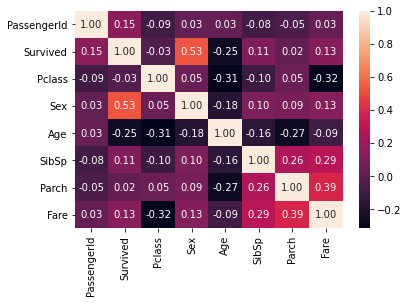

In [42]:
sns.heatmap(train.corr(method='pearson'), annot=True, fmt=".2f")


In [47]:
X_train = train.drop(columns = ["PassengerId", "Survived", "Name", "Ticket", "Cabin", "Embarked"], axis = 1)
y_train = train["Survived"]

print(test.head())

X_test = test.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis = 1)


    PassengerId  Pclass                                               Name  \
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
24          916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
26          918       1                       Ostby, Miss. Helene Ragnhild   
28          920       1                            Brady, Mr. John Bertram   

    Sex   Age  SibSp  Parch       Ticket      Fare            Cabin Embarked  
12    1  23.0      1      0        21228   82.2667              B45        S  
14    1  47.0      1      0  W.E.P. 5734   61.1750              E31        S  
24    1  48.0      1      3     PC 17608  262.3750  B57 B59 B63 B66        C  
26    1  22.0      0      1       113509   61.9792              B36        C  
28    0  41.0      0      0       113054   30.5000              A21        S  


In [48]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)


In [51]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(y_pred)


[1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1]
